In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Dog Image**

### **1. Load dataset**

(1200, 603)


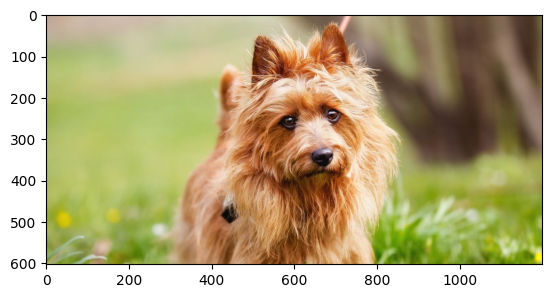

In [3]:
# Load image
img = Image.open('/content/drive/MyDrive/Samples/dog.jpeg')
print(img.size)
plt.imshow(np.asarray(img))

### **2. Image Preprocessing**

##### 1. 정사각형으로 변환 (image center cropping)

(603, 603)


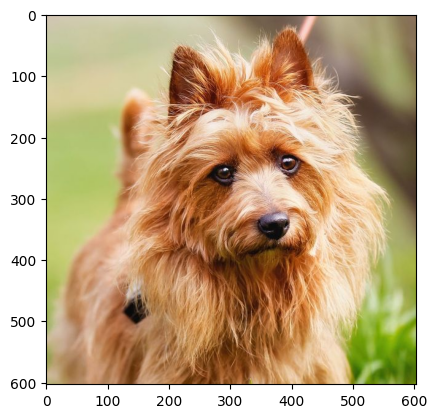

In [4]:
# Transform into square format
w, h = img.size
s = min(w, h)
x = (w - s) // 2
y = (h - s) // 2
img = img.crop((x, y, x+s, y+s))
print(img.size)
plt.imshow(np.asarray(img))

##### 2. 이미지 축소/확대 (resize)

(224, 224)


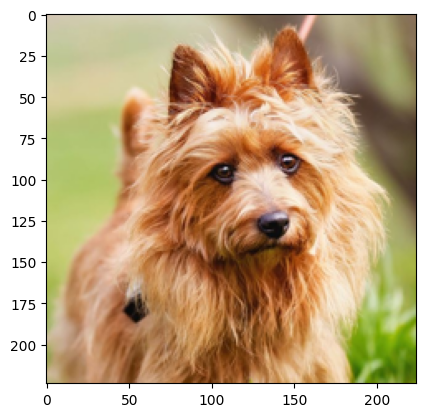

In [5]:
# Resize the image
target_size = (224, 224)
img = img.resize(target_size)
print(img.size)
plt.imshow(np.asarray(img))

##### 3. 이미지를 array로 변환

In [6]:
# Convert image into array
img_np = image.img_to_array(img)
print(img_np.shape)

(224, 224, 3)


##### 4. 배치 차원 추가 (4D array)

In [7]:
# Add batch dimension
img_batch = np.expand_dims(img_np, axis=0)
print(img_batch.shape)

(1, 224, 224, 3)


In [8]:
# Preprocess the image
img_preprocessed = preprocess_input(img_batch)

### **3. Modeling**

In [9]:
# Load VGG16 model
model = VGG16(weights='imagenet', include_top=True)
model.summary()

553467096/553467096 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

### **4. Prediction**

In [10]:
# Predict the image
y_pred = model.predict(img_preprocessed)
np.set_printoptions(suppress=True, precision=10)
print(decode_predictions(y_pred, top=5))

35363/35363 [==============================] - 0s 0us/step
[[('n02096294', 'Australian_terrier', 0.9753659), ('n02094433', 'Yorkshire_terrier', 0.013926015), ('n02094258', 'Norwich_terrier', 0.0065644593), ('n02094114', 'Norfolk_terrier', 0.0023927547), ('n02097658', 'silky_terrier', 0.0006809011)]]


# **Fish Image**

### **1. Load dataset**

(365, 297)


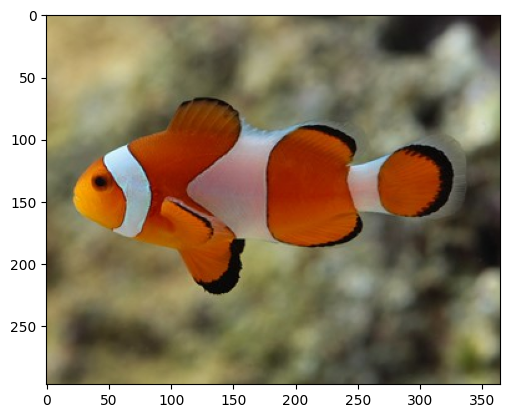

In [11]:
# Load image
img = Image.open('/content/drive/MyDrive/Samples/fish.jpg')
print(img.size)
plt.imshow(np.asarray(img))

### **2. Image Preprocessing**

##### 1. 정사각형으로 변환 (image center cropping)

(297, 297)


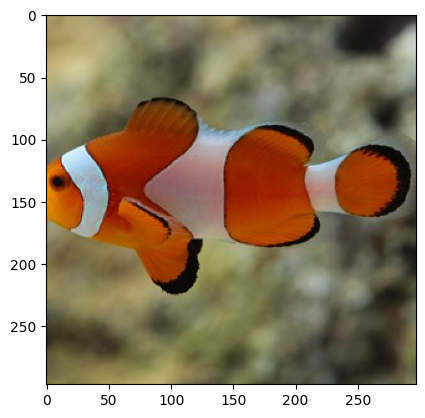

In [12]:
# Tansform into square format
w, h = img.size
s = min(w, h)
x = (w - s) // 2
y = (h - s) // 2
img = img.crop((x, y, x+s, y+s))
print(img.size)
plt.imshow(np.asarray(img))

##### 2. 이미지 축소/확대 (resize)

(224, 224)


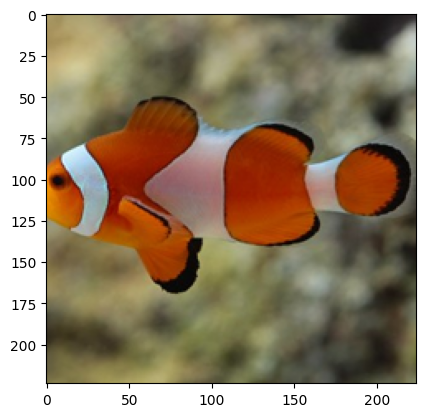

In [13]:
# Resize the image
target_size = (224, 224)
img = img.resize(target_size)
print(img.size)
plt.imshow(np.asarray(img))

##### 3. 이미지를 array로 변환

In [14]:
# Convert image into array
img_np = image.img_to_array(img)
print(img_np.shape)

(224, 224, 3)


##### 4. 배치 차원 추가 (4D array)

In [15]:
# Add batch dimenion
img_batch = np.expand_dims(img_np, axis=0)
print(img_batch.shape)

(1, 224, 224, 3)


In [16]:
# Preprocess the image
img_preprocessed = preprocess_input(img_batch)

### **3. Modeling**

In [ ]:
# Use VGG16 above

### **4. Prediction**

In [17]:
y_pred = model.predict(img_preprocessed)
np.set_printoptions(suppress=True, precision=10)
print(decode_predictions(y_pred, top=5))

1/1 [==============================] - 1s 843ms/step
[[('n02607072', 'anemone_fish', 0.98844063), ('n01950731', 'sea_slug', 0.0065042297), ('n09256479', 'coral_reef', 0.0023926834), ('n01914609', 'sea_anemone', 0.0018237658), ('n01924916', 'flatworm', 0.0006411478)]]
